In [ ]:
#import library pandas and numpy
import pandas as pd
import numpy as py

In [ ]:
#import library matplotlib dan sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#membaca dataset
dataRamen = pd.read_csv("ramen-ratings.csv")

#tampilkan data
dataRamen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [ ]:
#menghapus kolom top ten (data cleaning)
to_drop = ['Top Ten']

dataRamen.drop(to_drop, inplace =True, axis= 1)
dataRamen.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75


In [ ]:
#menyeleksi data/kolom yang akan digunakan
dataRamen = dataRamen[['Brand', 'Variety', 'Style']]
dataRamen.head()

,Brand,Variety,Style
0,New Touch,T's Restaurant Tantanmen,Cup
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack
2,Nissin,Cup Noodles Chicken Vegetable,Cup
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack
4,Ching's Secret,Singapore Curry,Pack


In [ ]:
#import label encoder untuk mengubah data huruf menjadi data angka 

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

dataRamen['Brand'] = enc.fit_transform(dataRamen['Brand'].values)
dataRamen['Variety'] = enc.fit_transform(dataRamen['Variety'].values)
dataRamen['Style'] = enc.fit_transform(dataRamen['Style'].astype(str))
dataRamen.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Brand,Variety,Style
0,190,2189,4
1,119,1443,5
2,192,454,4
3,336,709,5
4,38,1954,5


In [ ]:

#mengubah data yang nilainya terlalu jauh berbeda
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(dataRamen[['Brand']])
dataRamen['Brand']=scaler.transform(dataRamen[['Brand']])
scaler.fit(dataRamen[['Variety']])
dataRamen['Variety']=scaler.transform(dataRamen[['Variety']])
scaler.fit(dataRamen[['Style']])
dataRamen['Style']=scaler.transform(dataRamen[['Style']])
dataRamen.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Brand,Variety,Style
0,0.536723,0.907546,0.571429
1,0.336158,0.598259,0.714286
2,0.542373,0.188226,0.571429
3,0.949153,0.293947,0.714286
4,0.107345,0.810116,0.714286


In [ ]:
#menampilkan data yang ada di indeks kolom tertentu (kolom indeks ke-1 sampai kolom indeks ke-4)
data=dataRamen.iloc[:,1:4]
data


,Variety,Style
0,0.907546,0.571429
1,0.598259,0.714286
2,0.188226,0.571429
3,0.293947,0.714286
4,0.810116,0.714286
...,...,...
2575,0.352405,0.142857
2576,0.626451,0.714286
2577,0.933665,0.714286
2578,0.932007,0.714286


In [ ]:
#import davies_bouldin_score untuk melakukan klustering dengan Kmeans
from sklearn.metrics import davies_bouldin_score
results={}

for i in range(2,10): #range 2 sampai 10
  kmeans = KMeans(n_clusters=i, random_state=3) #random state 3
  labels = kmeans.fit_predict(data)
  db_index = davies_bouldin_score(data, labels)
  results.update({i: db_index})

In [ ]:
#hasil klustering
results

{2: 0.9218930962503252,
 3: 0.6861920262769177,
 4: 0.5567162450803688,
 5: 0.5917482955353537,
 6: 0.6443742809550447,
 7: 0.6069772554108999,
 8: 0.5734123342680477,
 9: 0.6153348873738366}

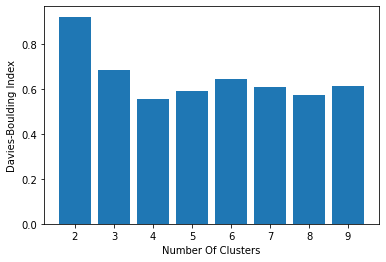

In [ ]:
#menampilkan diagram dari hasil klustering
plt.bar(list(results.keys()), list(results.values()))
plt.xlabel("Number Of Clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [ ]:
#membuat data predict
kmeans = KMeans(n_clusters=9, random_state=3)
kmeans.fit(data)
prediksi = kmeans.predict(data)

In [ ]:
#mencetak db indeks
db_index = davies_bouldin_score(data, prediksi)
print(db_index)

0.6153348873738366


In [ ]:
#menambahkan dan melihat jumlah kluster
dataRamen['jumlah kluster'] = prediksi
dataRamen

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Brand,Variety,Style,jumlah kluster
0,0.536723,0.907546,0.571429,3
1,0.336158,0.598259,0.714286,0
2,0.542373,0.188226,0.571429,1
3,0.949153,0.293947,0.714286,6
4,0.107345,0.810116,0.714286,8
...,...,...,...,...
2575,0.929379,0.352405,0.142857,2
2576,0.937853,0.626451,0.714286,0
2577,0.937853,0.933665,0.714286,3
2578,0.937853,0.932007,0.714286,3


In [ ]:
#menyimpan ke file baru
dataRamen.to_csv('Hasil Kelompok Aping_UAS 3F.csv', index=False)
